In [1]:
import scipy.stats as st
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# detection probability given sporadic shedding/dispersion
# model from https://www.preprints.org/manuscript/202104.0481/v1

# p: the probability of a sample containing a detectable concentration of a specific individual's excreted SARS-CoV-2
# P: probability of one sample containing detectable RNA given n people shedding
# PS: probability of detecting RNA in S samples
# n: number of people shedding SARS-CoV-2 RNA
# S: number of samples
# N: total population
# I: prevalence (% infected)
# Qdwf: the volume of wastewater per person per day (m3/person/day)
# Qdet: the volume of wastewater in which one person's shed RNA can be detected (m3)

def prob_of_detecting(S=1, N=1e5, I=0.1, Qdwf=0.15, Qdet=10, H=24, dp=5, show=True):
    
    # probability of a sample containing RNA from a specific person
    p = Qdet/((Qdwf*(H/24))*N)

    # probability of one sample containing some RNA given n people shedding
    n = N*(I/100)
    P = 1 - st.binom.cdf(k=0, n=n, p=p)

    # probability of S samples detecting RNA
    PS = 1 - st.binom.cdf(k=0, n=S, p=P)

    if show is True:
        print(str(np.round(PS*100,dp))+' %')
        
    return PS

var_names = ['S','N','I','Qdwf','Qdet']
M = len(var_names)

In [3]:
# with default values
PS = prob_of_detecting(S=10,I=0.01,Qdwf=0.2,H=4,Qdet=10)

25.95157 %


In [4]:
# with higher proportion of the population infected
PS = prob_of_detecting(I=0.05)

3.27947 %


In [5]:
# at lower dry weather flow
PS = prob_of_detecting(Qdwf=0.08)

11.75721 %


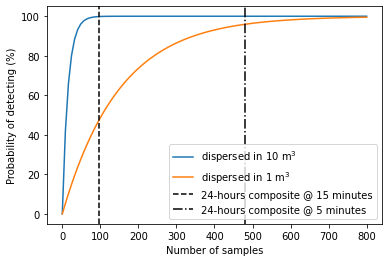

In [6]:
# effect of number of samples
vals = np.linspace(0, 800, 100)
plt.plot(vals, [prob_of_detecting(S=x, show=False)*100 for x in list(vals)],label='dispersed in 10 m$^3$')
plt.plot(vals, [prob_of_detecting(S=x, Qdet=1, show=False)*100 for x in list(vals)],label='dispersed in 1 m$^3$')
plt.axvline(x=(4*24),linestyle='--',color='k',label='24-hours composite @ 15 minutes')
plt.axvline(x=(20*24),linestyle='-.',color='k',label='24-hours composite @ 5 minutes')

plt.xlabel('Number of samples')
plt.ylabel('Probability of detecting (%)')
plt.legend()
#plt.savefig('figures/sampling_number_of_samples.png', dpi=300)

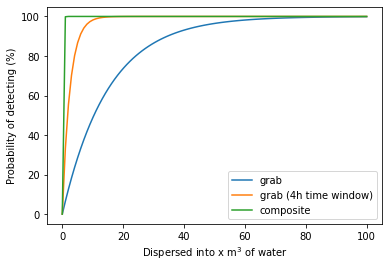

In [7]:
# effect of dispersion
vals = np.linspace(0, 100, 100)
plt.plot(vals, [prob_of_detecting(S=1, I=1, Qdet=x, show=False)*100 for x in list(vals)],label='grab')
plt.plot(vals, [prob_of_detecting(S=1, I=1, Qdet=x, H=4, show=False)*100 for x in list(vals)],label='grab (4h time window)')
plt.plot(vals, [prob_of_detecting(S=4*24, I=1, Qdet=x, show=False)*100 for x in list(vals)],label='composite')

plt.xlabel('Dispersed into x m$^3$ of water')
plt.ylabel('Probability of detecting (%)')
plt.legend()
#plt.savefig('figures/sampling_dispersion_prev1.png', dpi=300)

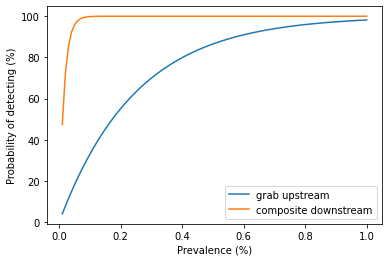

In [8]:
# assuming that upstream it is diluted in 1m3, and downstream in 10m3
vals = np.linspace(0.01, 1, 100)
plt.plot(vals, [prob_of_detecting(S=1, I=x, Qdet=10, H=4, show=False)*100 for x in list(vals)],label='grab upstream')
plt.plot(vals, [prob_of_detecting(S=4*24, I=x, Qdet=10, show=False)*100 for x in list(vals)],label='composite downstream')

plt.xlabel('Prevalence (%)')
plt.ylabel('Probability of detecting (%)')
plt.legend()
#plt.savefig('figures/sampling_just_compo.png', dpi=300)